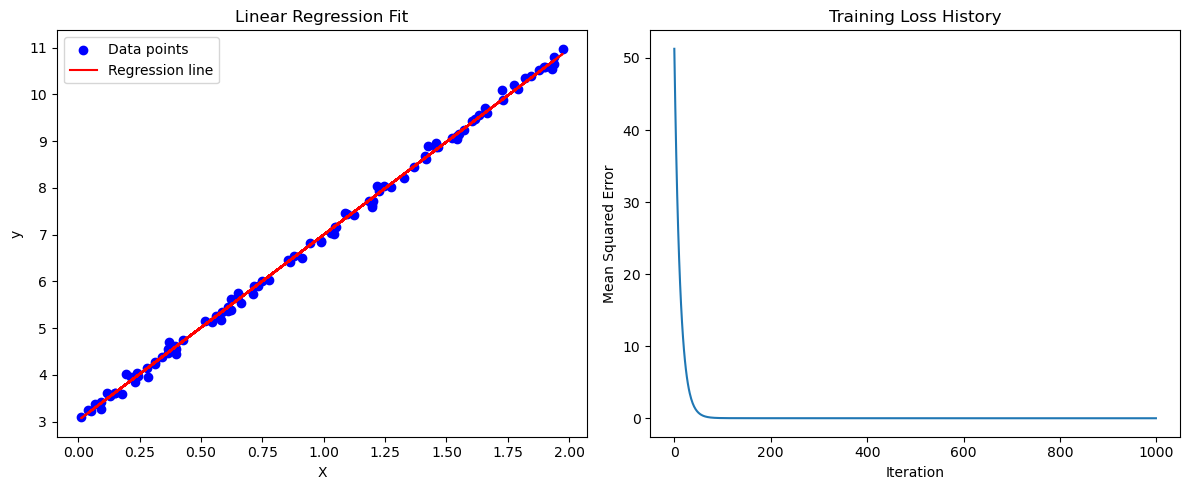

True parameters: weight=4, bias=3
Learned parameters: weight=3.97, bias=3.03


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def fit(self, X, y):
        # Initialize parameters
        n_samples = len(X)
        self.weights = 0
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iterations):
            # Forward pass
            y_predicted = self.weights * X + self.bias
            
            # Calculate gradients
            dw = -(2/n_samples) * np.sum(X * (y - y_predicted))
            db = -(2/n_samples) * np.sum(y - y_predicted)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss
            loss = np.mean((y - y_predicted) ** 2)
            self.loss_history.append(loss)
    
    def predict(self, X):
        return self.weights * X + self.bias

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 * X + 3 + np.random.randn(100, 1) * 0.1  # True relationship: y = 4x + 3 + noise

# Create and train model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)

# Visualize results
plt.figure(figsize=(12, 5))

# Plot training data and regression line
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Plot loss history
plt.subplot(1, 2, 2)
plt.plot(model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss History')

plt.tight_layout()
plt.show()

# Print final parameters
print(f"True parameters: weight=4, bias=3")
print(f"Learned parameters: weight={model.weights:.2f}, bias={model.bias:.2f}")